<a href="https://colab.research.google.com/github/Shourya306/Supervised-Machine-Learning---Regression-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [477]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet


import warnings
warnings.filterwarnings('ignore')  # Code to not show me any warnings that might arise.

pd.set_option('max_columns', None) # Code to make sure pandas shows me all the columns.

In [478]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [479]:
# Reading in the dataset.
# Encoded with "latin-1" because the default encoding wasn't able to encode the large file. 
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing Demand Prediction - Challa Shourya Chandra Sai./Copy of SeoulBikeData.csv',encoding ='latin')

In [480]:
# Viewing the first 5 rows.
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [481]:
# Viewing the last 5 rows.
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [482]:
# Understading the datatype of the columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [483]:
# Understanding basic stats.
dataset.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [484]:
# Checking the shape of the dataset.
dataset.shape

(8760, 14)

## **Defining The Problem Statement**

*Understanding the difference between continous variables and discrite variables.*

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Descrite variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

*Why Choose Linear Regression to model the data?*

Linear Regression is used to model the data because we want to predict the **dependent variable(y)** which is continous in nature.

*Segregating the variables into **dependent & independent** variables[categorical or numeric continous/discrete].*

Dependent variable(Y): **Rented Bike Count**

Independent variable(X):

  * Date = Breaking the column into 3 seperate columns - Date, Month, Year.

  * Hour = Numeric Descrite Variable.

  * Temperature(°C) = Continous Variable.

  * Humidity(%) = Continous Variable.

  * Wind speed (m/s) = Continous Variable.

  * Visibility(10m) = Continous Variable.

  * Dew point temperature(°C) = Continous Variable.

  * Solar Radiation (MJ/m2) = Continous Variable.

  * Rainfall(mm) = Continous Variable.

  * Snowfall(cm) = Continous Variable.

  * Seasons = Categorical Variable of 4 classes.

  * Holiday = Categorical Variable of 2 classes.

  * Functioning Day = Categorical Variable of 2 classes.


## Data Preprocessing

Checking if there are any duplicate values in the dataset.

In [485]:
dataset[dataset.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


**We can see that there aren't any duplicate values in the dataset. It is essential to remove dublicate values in the dataset for our model to generalize the unseen data.**

Checking for null values.

In [486]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Thank god! there aren't any null values.**

Working on the date column.

In [487]:
# Converting the Date column dtype to datetime so that we can extract the month and the year from the date column.
dataset['Date'] = dataset['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [488]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

In [489]:
# Creating a new column
dataset['Is_Weekend']=dataset['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=dataset.drop(columns=['Date','day','year'],axis=1)

In [490]:
dataset.drop(['day','Date'], inplace = True, axis = 1)

In [491]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,Is_Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0


In [492]:
dataset['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [493]:
dataset['month'].value_counts()

12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

I will be dropping the date column from the dataset since we have extracted all the required information from it.

In [494]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  year                       8760 non-null   int64

In [495]:
# Converting the datatype of year column into a category from object.
dataset['year'] = dataset['year'].astype('category')

In [496]:
dataset['month'] = dataset['month'].astype('category')
dataset['Hour'] = dataset['Hour'].astype('category')

In [497]:
dataset['Rainfall(mm)'] = dataset['Rainfall(mm)'].astype('category')
dataset['Snowfall (cm)'] = dataset['Snowfall (cm)'].astype('category')
dataset['Is_Weekend'] = dataset['Is_Weekend'].astype('category')

## Exploratory Data Analysis

Exploratory Data Analysis is performed to understand the relationship between independent variables and dependent variable.



### EDA on Numeric Data

**Hypothesis** - Summer Months viz. March, April, May, June will see a rise in the usage of bikes because teenagers might use it during their summer breaks.

Text(0.5, 1.0, 'Month vs Rented Bike')

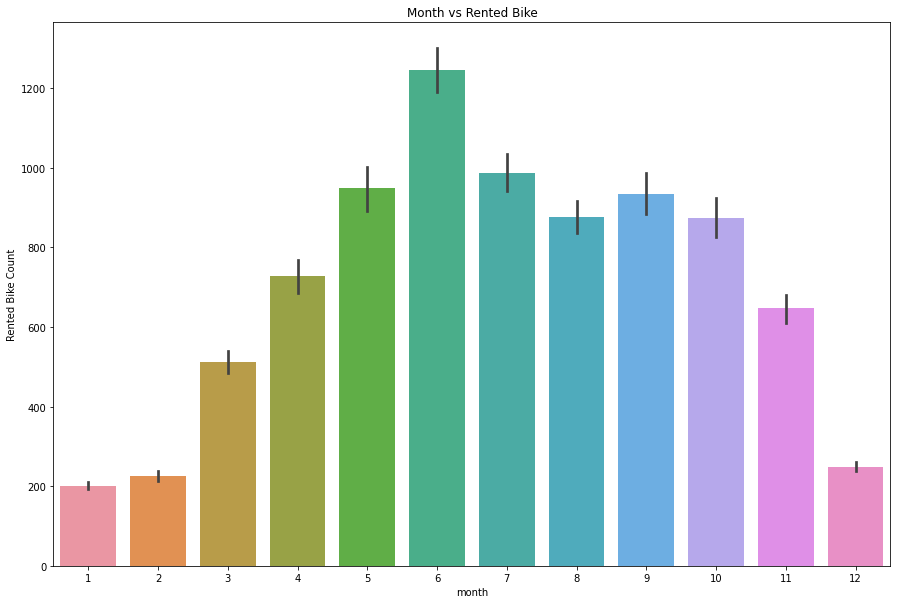

In [498]:
# Plotting a barplot on month vs rented bike
plt.figure(figsize = (15,10))
sns.barplot(x = dataset['month'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Month vs Rented Bike')

**Analysis** - My hypothesis was right, Usage of bikes are high on March, April, May, and June.

**Hypothesis** - Mornings and Evenings we might see the usage of bike augment. The working population might be using these to commute to work.

Text(0.5, 1.0, 'Hour vs Rented Bike')

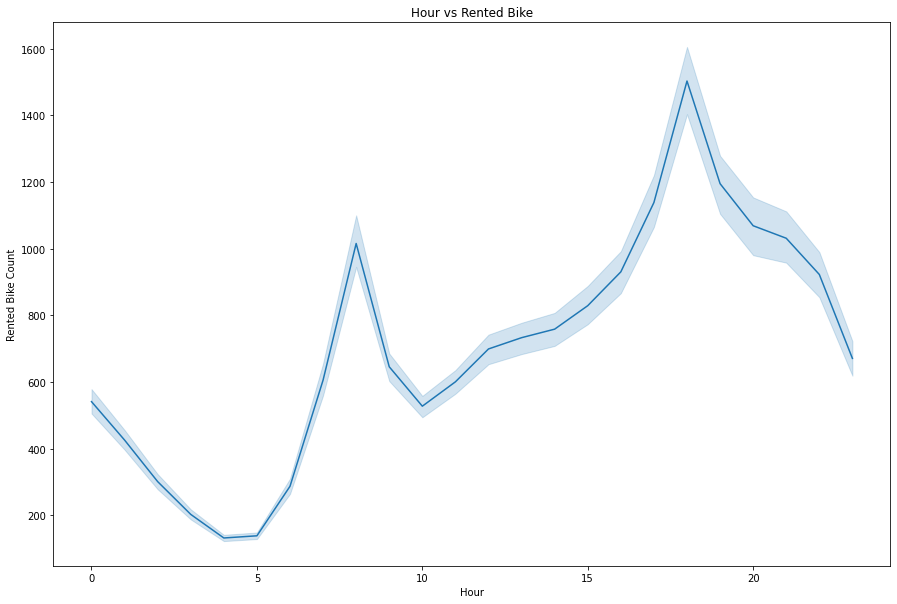

In [499]:
# Plotting a line plot on hour vs rented bike count
plt.figure(figsize = (15,10))
sns.lineplot(x = dataset['Hour'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Hour vs Rented Bike')

**Analysis** - My hypothesis is right, we can see the usage of bikes is more the mornings and evenings.

**Hypothesis** - The use of bikes will be low when the snowfall is high. 

Text(0.5, 1.0, 'Snowfall (cm) vs Rented Bike')

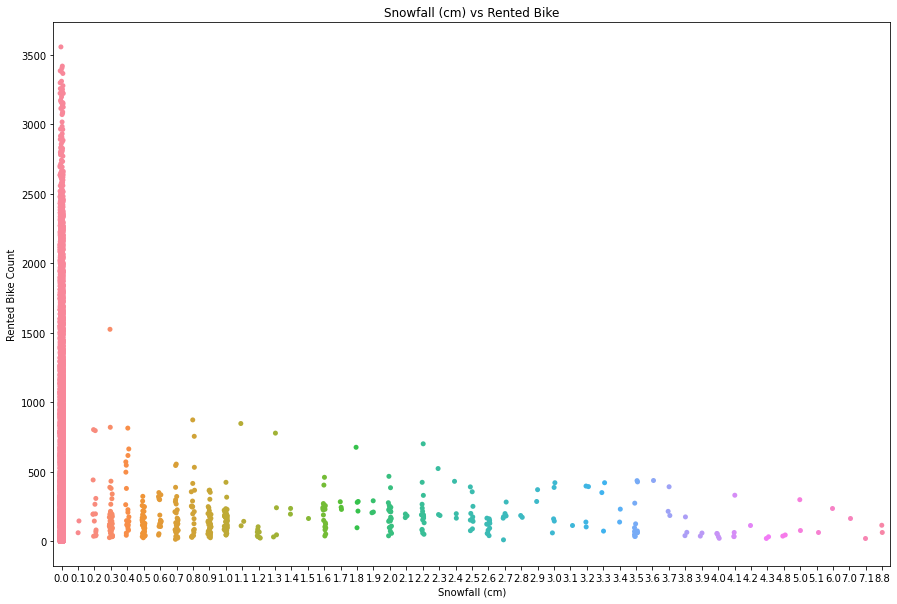

In [500]:
# Plotting a stripplot on snowfall vs rented bike plot
plt.figure(figsize = (15,10))
sns.stripplot(x = dataset['Snowfall (cm)'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Snowfall (cm) vs Rented Bike')

**Analysis** - Yayy!! my hypothesis was indeed ture.

### EDA on Categorical Data

**Hypothesis** - Usage of bikes during summer will be more when compared to other months.

Text(0.5, 1.0, 'Seasons vs Rented Bike')

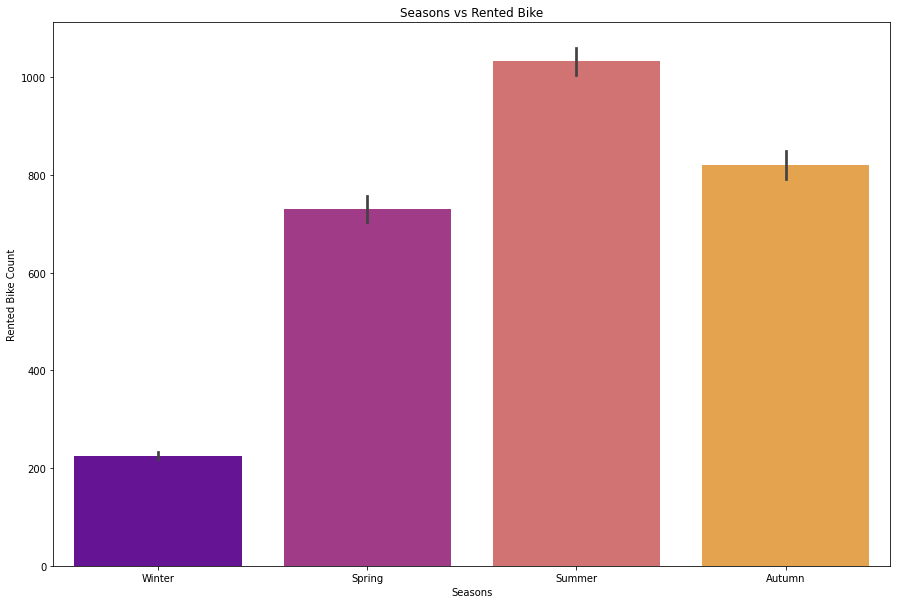

In [501]:
# Plotting a barplot on Seasons vs Rented Bike
plt.figure(figsize=(15,10))
sns.barplot(x = dataset['Seasons'], y = dataset['Rented Bike Count'], data = dataset, palette ='plasma')
plt.title('Seasons vs Rented Bike')

**Analysis** - My Hypothesis is correct.

**Hypothesis** - Usage of bikes might be more during the working days as the population might use these bikes for commuting to work.

Text(0.5, 1.0, 'Holiday vs Rented Bike')

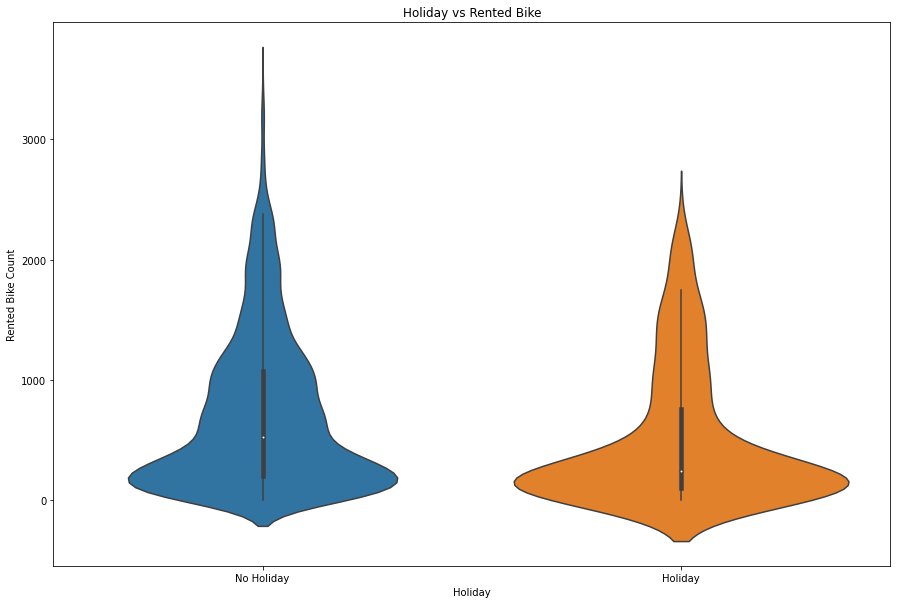

In [502]:
# Plotting a voilin plot on Holiday vs Rented Bike.
plt.figure(figsize = (15,10))
sns.violinplot(x = dataset['Holiday'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Holiday vs Rented Bike')

**Analysis** - My Hypothesis is correct.

## Linear Regression

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

* The distributions of the variables should be normal.

* Independent variables should show linear relationship with dv.

* No multicollinearity in the dataset.

* Residual mean should be 0 or close to 0.

* There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

**Before Implemeting the linear regression, we will be making sure that all the assumptions of linear regression are met.**


### Working on dependent variable.

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

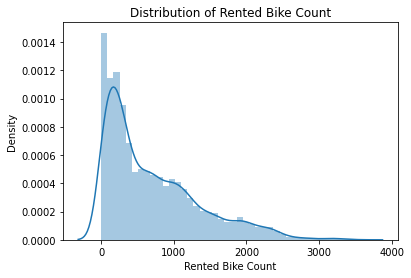

In [504]:
# Distribution of Dependent variable.
sns.distplot(dataset['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

From the above distribution plot, we can see that the distribution is right skewed. We can transform it to a normal distribution by square-root transformation.

Text(0.5, 1.0, 'Square_root distribution of Rented Bike Count')

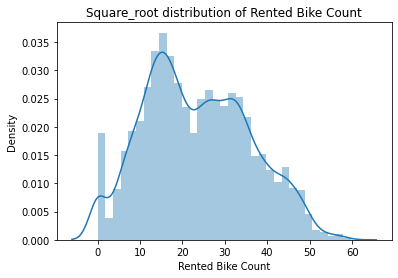

In [505]:
# Squared_root distribution of dependent variable.
square_root_transformations = np.sqrt(dataset['Rented Bike Count'])
sns.distplot(square_root_transformations)
plt.title('Square_root distribution of Rented Bike Count')

### Working on Independent Numeric Variables.

In [506]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   category
 9   Snowfall (cm)              8760 non-null   category
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  year                       8760 n

In [507]:
# Creating a list of numeric variables.
numeric_variables = dataset.describe(include = ['int64', 'float64']).columns
numeric_variables = list(set(numeric_variables) - {'Rented Bike Count','year'})
numeric_variables

['Dew point temperature(°C)',
 'Visibility (10m)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Temperature(°C)']

From the list of numeric variables, I have removed Rented Bike Count and Year. Because Rented Bike count is dependent variable and Year is a categorical variable.

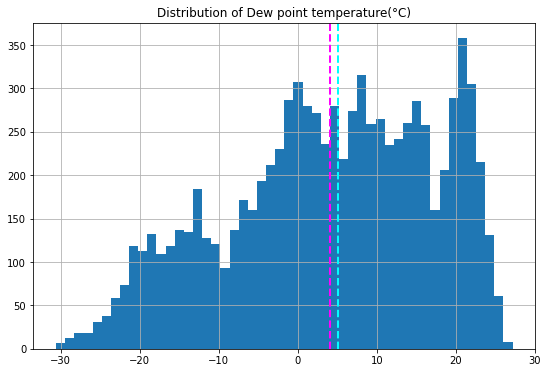

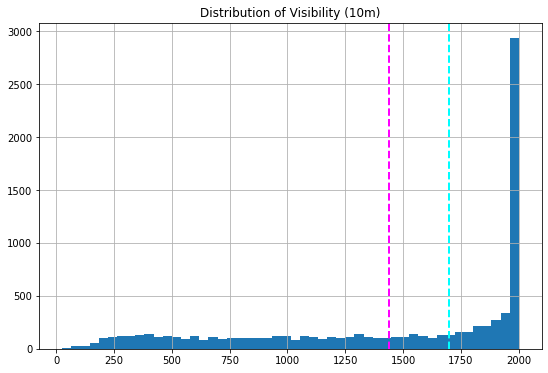

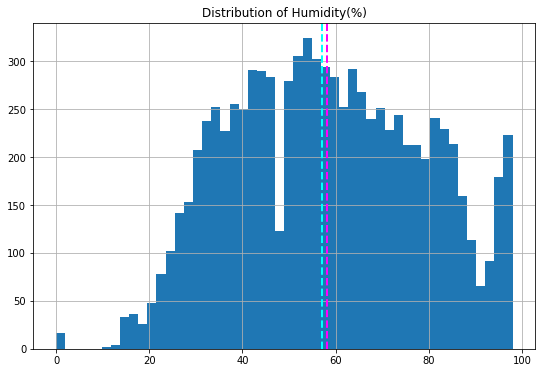

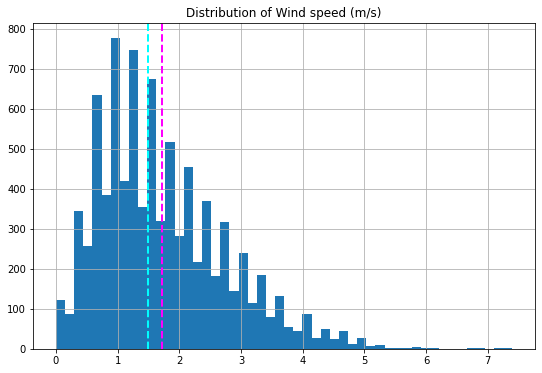

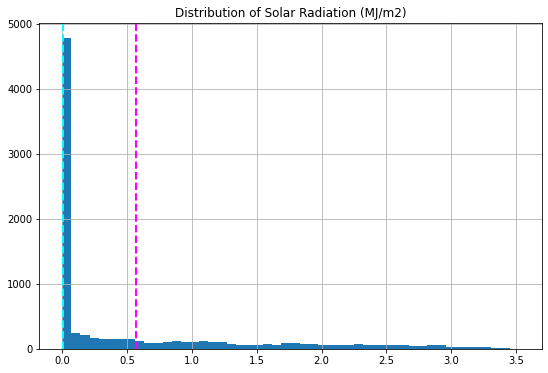

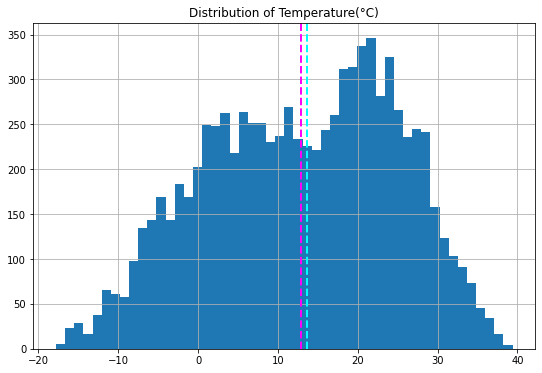

In [508]:
# Using a for loop to plot the distributions of all the numeric variables.
for col in numeric_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title('Distribution of '+ col)
plt.show()

The magenta line represents the mean of the distribution and the cyan line represents the median of the distribution.

There are a few columns whose distributions are skewed like Snowfall, solar radiation, Visibility. I will be removing the outliers for all of these columns so that there distributions will approximate to a normal distribution.

In [509]:
numeric_variables

['Dew point temperature(°C)',
 'Visibility (10m)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Temperature(°C)']

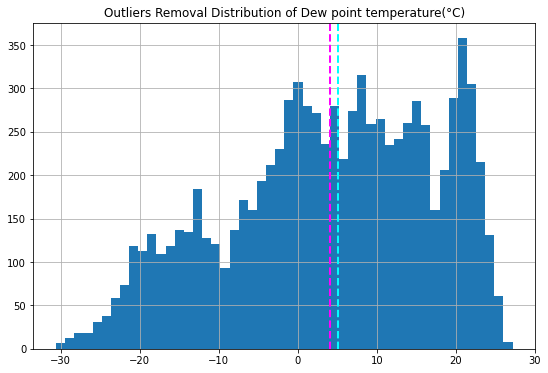

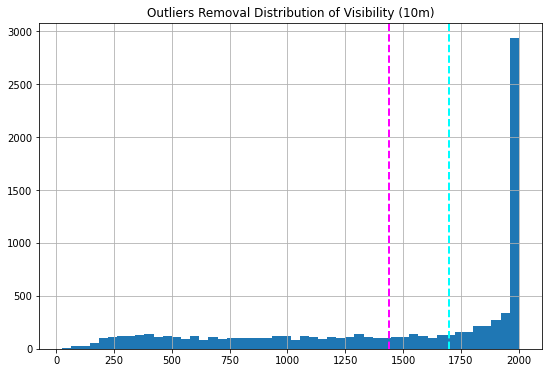

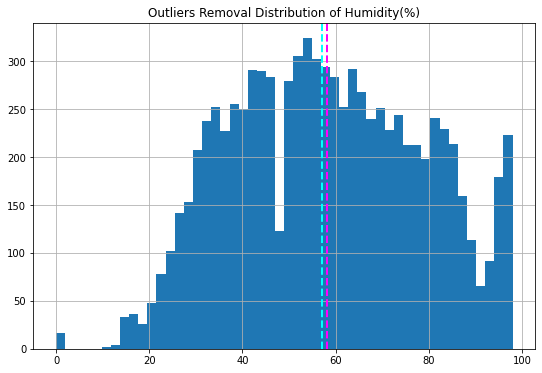

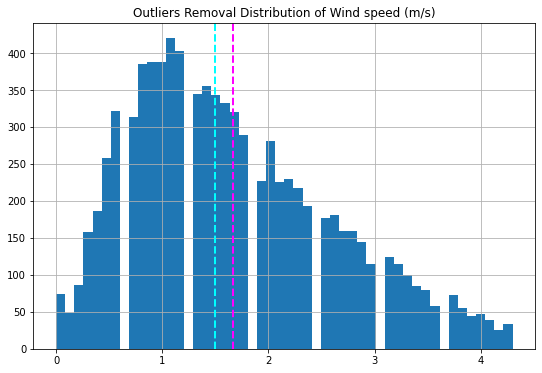

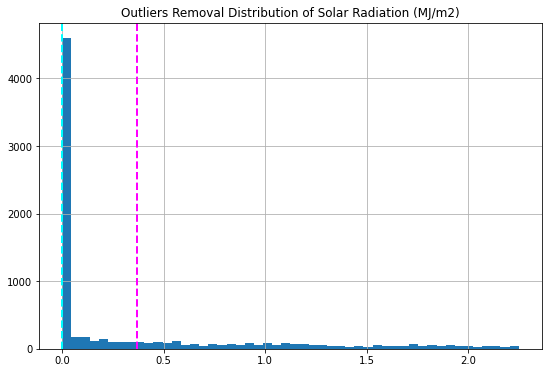

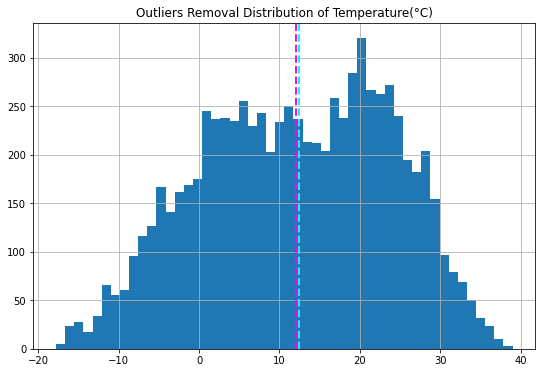

In [510]:
# Using for loop to remove the outliers which are represent in the dataset of every column.
for col in numeric_variables:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  Q1 = np.percentile(dataset[col],25)
  Q3 = np.percentile(dataset[col],75)
  IQR = Q3 - Q1
  Lower_outliers = Q1 - 1.5*IQR
  Upper_outliers = Q3 + 1.5*IQR
  dataset = dataset[(dataset[col] >= Lower_outliers) & (dataset[col] <= Upper_outliers)]
  feature = dataset[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title('Outliers Removal Distribution of '+ col)
plt.show()

Form the above histogram plots we can see that the distributions of the numeric variables look more like a normal distribution after removing the outliers.

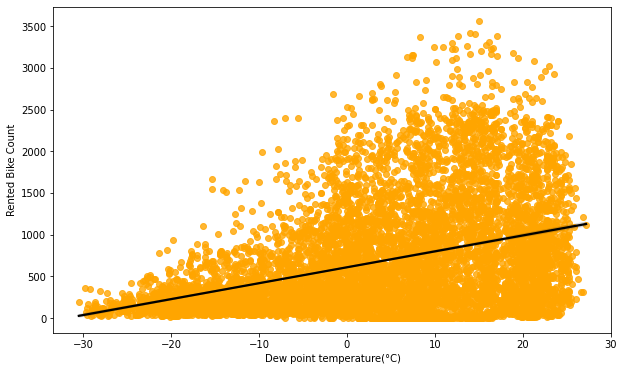

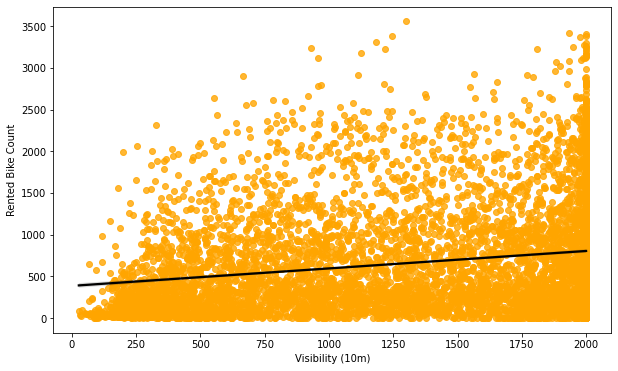

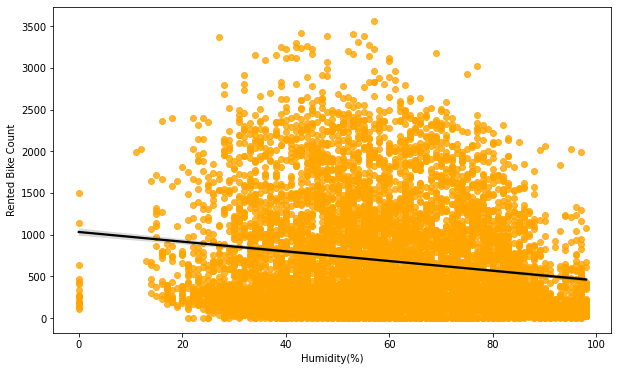

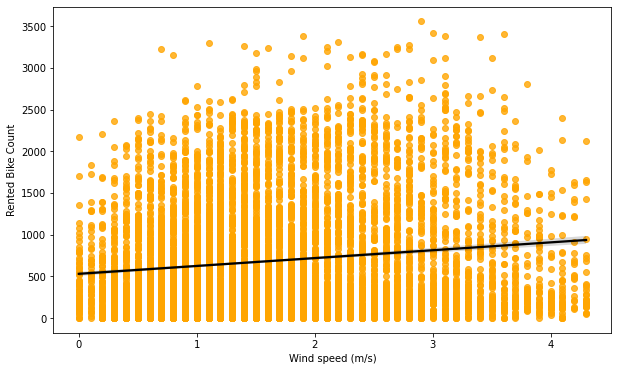

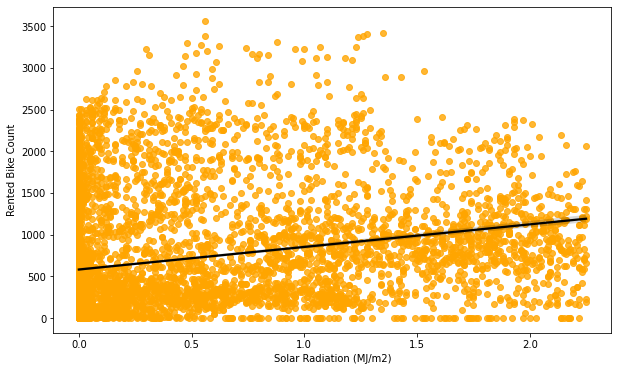

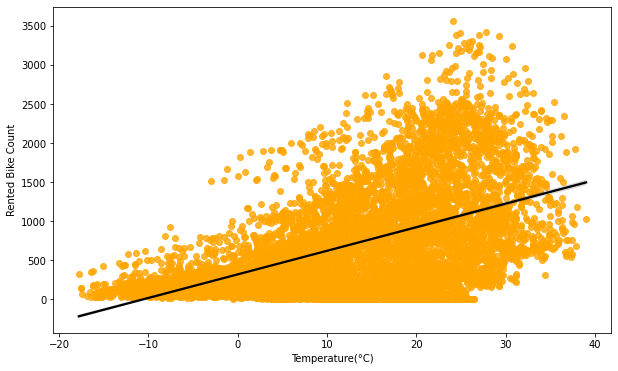

In [511]:
# Creating a for loop to plot scatterplot.
for col in numeric_variables:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=dataset[col],y=dataset['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

 From the above scatter plots we can see that the relationships between dependent and independent variables is a linear one.

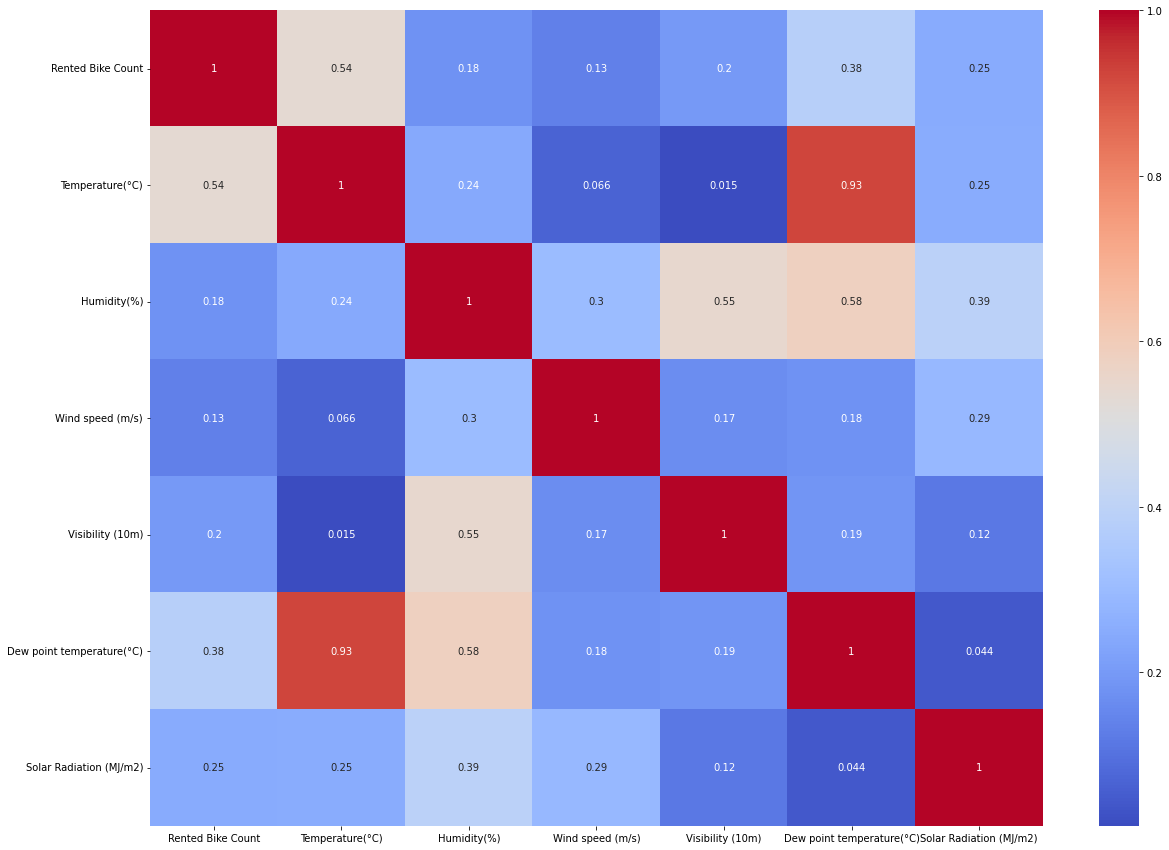

In [512]:
# Let us look at the correation table.
corr = dataset.corr()
plt.figure(figsize = (20,15))
sns.heatmap(abs(corr), cmap = 'coolwarm', annot = True)

The objective here is to find those columns that have a very low correlation with the dependent variable and dropping those columns so that we can reduce the complexity of the model that we are going to build.

From the correlation table we can see that the correlation of rainfall and snowfall is zero so i will drop these columns, because for the entire dataset the values that rainfall and snowfall takeup are constant.

Also from the correlation table we can see that **Date** column has a very low correlation with **Rented Bike Count** so I will drop that column.

And also since the **Dew Point Temperature** and **Temperature** are highly correlated(0.92) to each other, we can drop column.

I will drop the **Dew Point Temperature** since it relatively less correlated to rented bike count than **Temperature**.

In [513]:
# Dropping Dew Point Temperature and Date columns.
dataset.drop(['Dew point temperature(°C)'], inplace = True, axis = 1)

In [514]:
#Removing Multicollinearlity using VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [515]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Temperature(°C),2.607299
1,Humidity(%),4.331284
2,Wind speed (m/s),4.095804
3,Visibility (10m),4.116021
4,Solar Radiation (MJ/m2),1.819109


**Objective** - Our objective hear is to make sure that the VIF of all the columns above is below 5. If the VIF of all the columns are below 5, then we can safely assume that there is no multicollinearity between the independent variables.

If you can see there are two variables(Humidity, Visibility) which has a VIF of above 5.

**Approach used to reduce the VIF**- We will check what other variable has a VIF value of the same range. In this case, Visibility column has a VIF of the same range.

We will check both the variables corrrelation to confrim our finding that they indeed are correlated and remove the feature that has the lowest correlation with dependent variable(**Rented Bike Count**)

We can see both the Humidity has the least correlation of the two **.11** with **Rented Bike Count** hence we can remove any one of them.

Following the same approach as above, I have removed humiditity too. Now we can see all the variables VIFs are below 5.

In [516]:
# My final Numerical Variable.
final_numerical_var = list(set(dataset.describe().columns) - {'Rented Bike Count'})

In [517]:
final_numerical_var

['Humidity(%)',
 'Visibility (10m)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Temperature(°C)']

###Working on Categorical Variables.

In [518]:
dataset['Hour'] = np.where(dataset['Hour'] == 18, 'peak','non-peak')
dataset['Is_raning'] = np.where(dataset['Rainfall(mm)'] != 0.0,'Yes','No')
dataset['Is_snowing'] = np.where(dataset['Snowfall (cm)'] != 0.0, 'Yes','No')

In [519]:
dataset.drop(['Rainfall(mm)','Snowfall (cm)'],axis = 1, inplace = True)

In [520]:
# Storing all the categorical variables in a variable.
categorical_variables = list(dataset.describe(include = ['object','category']).columns)

In [521]:
categorical_variables

['Hour',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'year',
 'month',
 'Is_Weekend',
 'Is_raning',
 'Is_snowing']

In [522]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,year,month,Is_Weekend,Is_raning,Is_snowing
0,254,non-peak,-5.2,37,2.2,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No
1,204,non-peak,-5.5,38,0.8,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No
2,173,non-peak,-6.0,39,1.0,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No
3,107,non-peak,-6.2,40,0.9,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No
4,78,non-peak,-6.0,36,2.3,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No


**Objective** - The objective is to encode the categorical variables so that the model can read the data in.

Categorical Variables are classified into 3 types:

* Dichotomous variables = These are those categorical variables which have only **2 classes** of categories. We can perfom binary encoding for these kind of variables.

* Ordinal Variables = These are those categorical variables which have **more than 2 classes** of categories and they signify **some order**. We can perform label encoding.

* Nominal Variables = These are those categorical variables which have **more than 2 classes** of categories and they do not signify **any order**. We can perform One hot encoding.

There are 3 dichotomous variables[**Holiday, Functioning day, year**]. I will be performing binary encoding for these.

There is one nominal variable[**Seasons**]. I will be performing one hot encoding.

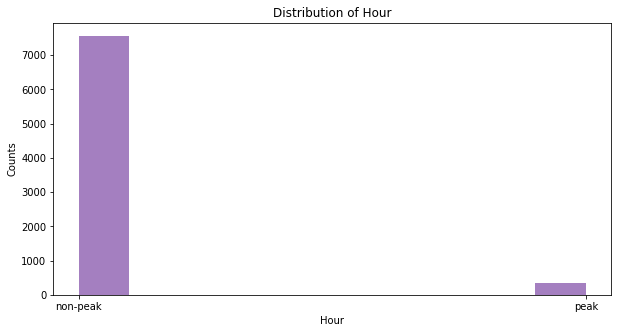

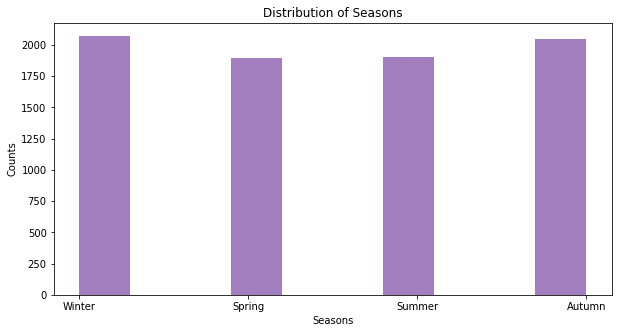

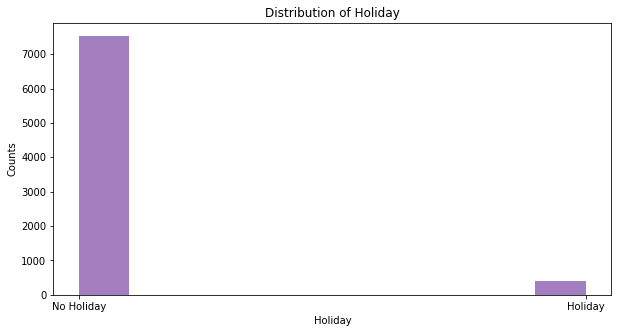

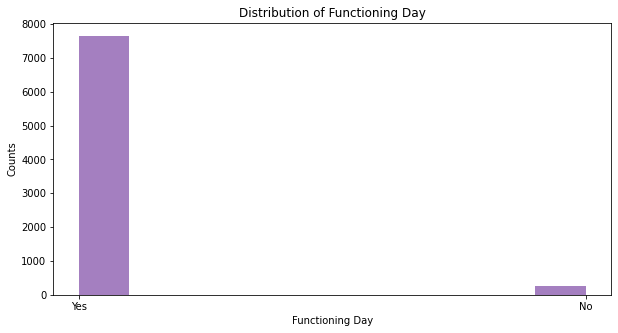

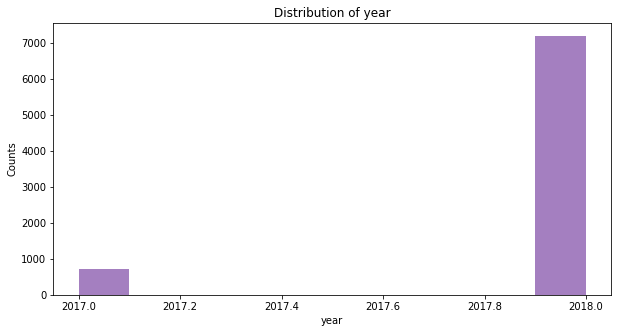

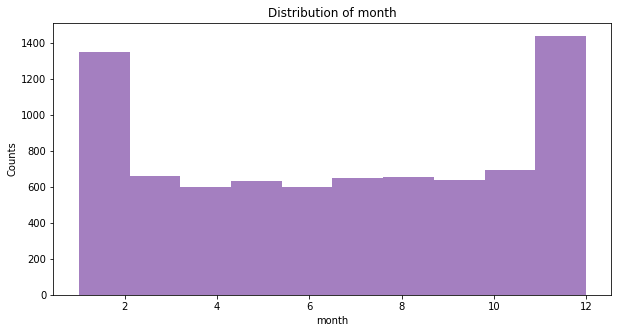

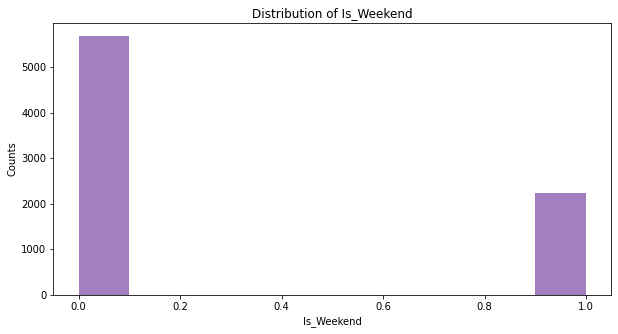

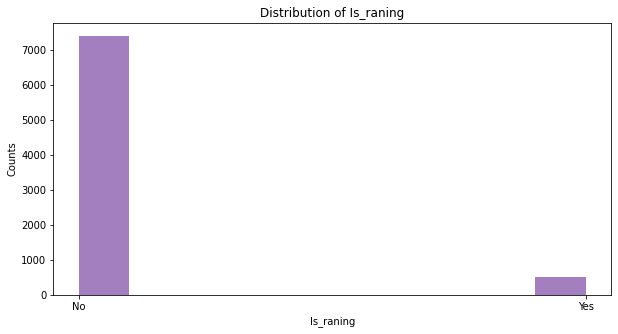

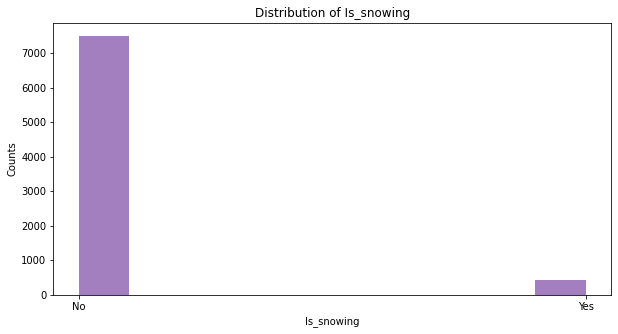

In [523]:
# Using the histograms to understand how the distribution of categorical variables.
for col in categorical_variables:

  fig = plt.figure(figsize = (10,5))
  ax = plt.gca()
  plt.hist(dataset[col], alpha = .5, color = 'indigo')
  plt.title('Distribution of ' + col)
  plt.xlabel(col)
  plt.ylabel('Counts')

Form the above distirbutions, we can conclude that apart from seasons all the other categorical variables are not equally distributed.

In [524]:
# Binary encoding.
binary_encoding = {'Holiday':{'No Holiday':0,'Holiday':1}, 'Functioning Day':{'Yes':1,'No':0}, 'year':{2018:1,2017:0},'Hour':{'peak':1,'non-peak':0},
                   'Is_raning':{'Yes':1,'No':0},'Is_snowing':{'Yes':1,'No':0}}
df = dataset.replace(binary_encoding)

In [525]:
# One hot encoding.
df = pd.get_dummies(df,columns = ['Seasons','month'],prefix = ['Season_','Month_'])

### Train Test Split.

The Train Test Split function is used to split the dataset in 4 parts[Independent train, independent test, dependent train, dependent test].  

In [526]:
# Preparing the data for train test split.
dependent_var = {'Rented Bike Count'}
independent_var = list(set(df.columns) - dependent_var)

In [527]:
independent_var

['Month__3',
 'Month__6',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Season__Winter',
 'Season__Autumn',
 'Month__4',
 'Month__9',
 'Season__Spring',
 'Month__1',
 'Holiday',
 'Is_Weekend',
 'Month__7',
 'Month__5',
 'Month__8',
 'Month__10',
 'year',
 'Is_snowing',
 'Visibility (10m)',
 'Season__Summer',
 'Month__12',
 'Solar Radiation (MJ/m2)',
 'Month__2',
 'Month__11',
 'Temperature(°C)',
 'Is_raning',
 'Functioning Day',
 'Hour']

In [528]:
# Storing the data into X and y variables.
X = df[independent_var].values
y = np.sqrt(df[dependent_var].values)

In [529]:
# Performing train_test_split.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 9999)

I have used random sampling and not used stratified sampling to split the dataframe because it doesn't have sense to use stratify sampling when your dependent variable is continous.

### Rescaling the independent variables as all the variables are on a different scales.

In [530]:
# Scaling the variables using MinMaxScaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression Implementation.

In [531]:
# Fitting a best line to our model.
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [532]:
# Checking out the intercept and coefficients of the model.
regressor.intercept_

array([-6.28191318e+12])

In [533]:
regressor.coef_

array([[ 6.23358041e+13,  1.87744068e+13, -1.25464014e+01,
         4.79057872e+00, -6.44672075e+13,  1.60311577e+14,
         6.23358041e+13, -6.69741213e+13,  3.10016515e+13,
         1.57804663e+14, -3.51466485e+00, -1.90874711e+00,
         1.87744068e+13,  6.23358041e+13,  1.87744068e+13,
        -6.69741213e+13, -8.70555424e+13,  8.50097656e-01,
         1.95117188e+00,  7.45630488e+13,  7.07491207e+13,
        -1.46218872e+00,  1.57804663e+14, -6.69741213e+13,
         4.11250000e+01, -1.23076172e+01,  2.92485352e+01,
         9.13433838e+00]])

In [534]:
# Predicting the values of X_test from the above intercept and coef_.
y_predict_train = regressor.predict(X_train)
y_predict_test = regressor.predict(X_test)

### Heteroscadacity/ Homoscadacity

Text(0, 0.5, 'Residuals')

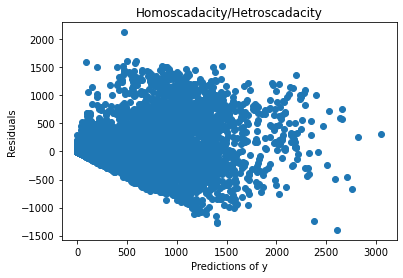

In [535]:
# Checking for Heteroscadacity/ Homoscadacity.
residuals = ((y_train**2) - (y_predict_train**2))
y_predicted = y_predict_train**2
plt.scatter(x = y_predicted, y = residuals)
plt.title('Homoscadacity/Hetroscadacity')
plt.xlabel('Predictions of y')
plt.ylabel('Residuals')

From the above plot, we can conclude that there is **homoscadacity**, as there isn't conspicuous pattern in the plot.

###Checking the mean of the residuals.

In [537]:
# Mean of the residuals.
np.mean(residuals)

53.600431889959104

The mean of the residuals is close to zero, so for assumption is valid.

In [538]:
# Printing all the metrics of training data.
r2_train = r2_score(y_train**2,y_predict_train**2)
print('R2 score:' ,r2_train)

adjusted_r2_train = (1-(1-r2_score(y_train**2, y_predict_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2 score: ', adjusted_r2_train)

mse_train = mean_squared_error(y_train**2,y_predict_train**2)
print('MSE: ',mse_train)

mae_train = mean_absolute_error(y_train**2,y_predict_train**2)
print('MAE: ',mae_train)

R2 score: 0.6117623925531069
Adjusted R2 score:  0.6047716189141918
MSE:  166166.57050640605
MAE:  279.56259726469085


In [539]:
# Printing all the metrics of testing data.
r2_test = r2_score(y_test**2,y_predict_test**2)
print('R2 score: ',r2_test)

adjusted_r2_test = (1-(1-r2_score((y_test**2), (y_predict_test**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test)

mse_test = mean_squared_error(y_test**2,y_predict_test**2)
print('MSE: ',mse_test)

mae_test = mean_absolute_error(y_test**2,y_predict_test**2)
print('MAE: ',mae_test)

R2 score:  0.6227814368543034
Adjusted R2 score:  0.6159890768748311
MSE:  170576.44835974774
MAE:  281.7627359634698


If we compare the performance metrics of linear regression on both traning and testing data, we can see that our model performs better on the testing than on training. 

From this we can conclude that the model is not overfitting.

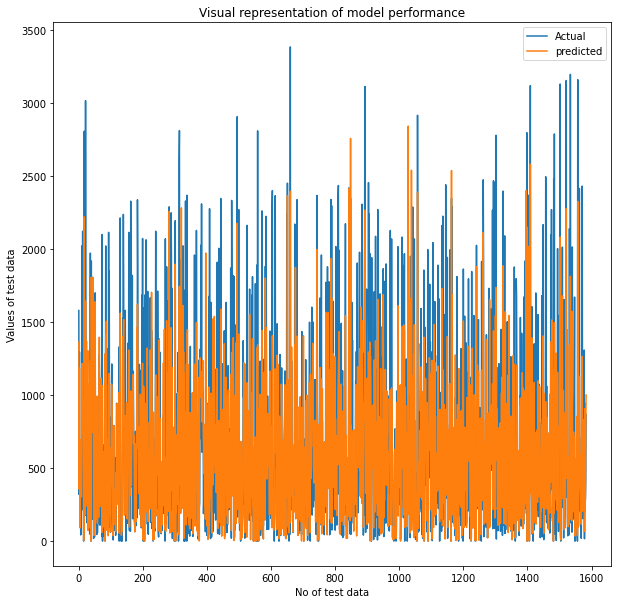

In [540]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(y_predict_test**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

### Finding out the average performance of the model

In [597]:
# Cross validation.
cv_model = cross_validate(regressor, X_train,y_train,scoring = 'r2', cv = 10, return_train_score = True)

In [598]:
cv_model

{'fit_time': array([0.00845098, 0.01428103, 0.01372075, 0.01450634, 0.01649642,
        0.01591468, 0.00724769, 0.00674129, 0.00737691, 0.00696397]),
 'score_time': array([0.00704598, 0.00216937, 0.00238729, 0.00259423, 0.00250745,
        0.00166774, 0.00081825, 0.00080705, 0.00079703, 0.00078368]),
 'test_score': array([0.64250805, 0.65965649, 0.64536393, 0.65740145, 0.61753313,
        0.6794251 , 0.67318582, 0.68963033, 0.69344243, 0.69465755]),
 'train_score': array([0.67161686, 0.66958298, 0.67104135, 0.66984703, 0.67395175,
        0.66754003, 0.66820062, 0.66629349, 0.66591363, 0.66569251])}

In [599]:
# Average accuracy of the model.
avg_per = np.mean(cv_model['test_score'])
print('The average performance of the model is',avg_per)

The average performance of the model is 0.6652804279518743


## Regularized Linear Regression


Regularized Linear Regression is implemented when the model is overfitting. It reduces the complexity of the model by penalising the coefficients. There are 3 regularised linear regressions:

* Lasso 

* Ridge

* Elastic Net

I will be implementing all of them to see if my model performance improves.
Personally, I don't think my model performance improves because my model is not overfitting.

### Lasso Implementation.

In [545]:
# Implementing Lasso Regression
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train) #Fitting lasso to the model.

Lasso(alpha=0.1)

In [546]:
independent_var

['Month__3',
 'Month__6',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Season__Winter',
 'Season__Autumn',
 'Month__4',
 'Month__9',
 'Season__Spring',
 'Month__1',
 'Holiday',
 'Is_Weekend',
 'Month__7',
 'Month__5',
 'Month__8',
 'Month__10',
 'year',
 'Is_snowing',
 'Visibility (10m)',
 'Season__Summer',
 'Month__12',
 'Solar Radiation (MJ/m2)',
 'Month__2',
 'Month__11',
 'Temperature(°C)',
 'Is_raning',
 'Functioning Day',
 'Hour']

In [547]:
print(lasso.coef_)
print(lasso.intercept_)

[ -0.53880721   3.87690219 -11.73320449   3.00740789  -3.69755515
   2.33709252  -0.          -0.          -0.          -0.
  -0.94462963  -1.3241083    0.           1.49220732  -1.3839463
   0.98644058  -0.          -0.           0.22410067   0.
   0.           0.          -0.81155018   0.          27.30555972
 -11.14884416  25.27346294   8.02329129]
[-9.03841506]


In [548]:
# Predicting the Training values to analyse the performance of the training.
y_train_predict_lasso = lasso.predict(X_train)

Text(0, 0.5, 'Residuals')

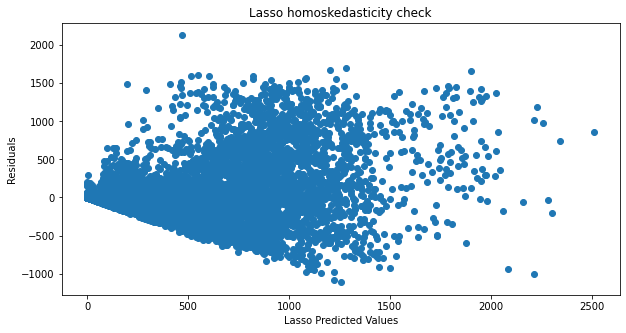

In [550]:
# Let us check if the assumptions of homoskedasticity and the residual mean ~= 0 are valid.
# homoskedasticity check.
residuals_lasso = (((y_train.flatten())**2) - (y_train_predict_lasso)**2)
y_predicted_lasso = y_train_predict_lasso**2
plt.figure(figsize = (10,5))
plt.scatter(x = y_predicted_lasso, y = residuals_lasso)
plt.title('Lasso homoskedasticity check')
plt.xlabel('Lasso Predicted Values')
plt.ylabel('Residuals')

**Note** - I have flattened the y_train because it was a 2d array whereas y_train_predict_lasso was 1d.

By looking at the scatter plot we can infer that the homoskedasticity assumption is true as there isn't they clear pattern that is being shown by the plot.

In [551]:
# Checking if the mean of the residuals is zero or close to zero.
np.mean(residuals)

53.600431889959104

The mean of the residuals is indeed close to zero.

In [552]:
# We will predict the test values.
y_test_predict_lasso = lasso.predict(X_test)

In [553]:
# Printing all the metrics of lasso training data.
r2_train_lasso = r2_score(y_train**2,y_train_predict_lasso**2)
print('R2 score:' ,r2_train_lasso)

adjusted_r2_train_lasso = (1-(1-r2_score(y_train**2, y_train_predict_lasso**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2 score: ', adjusted_r2_train_lasso)

mse_train_lasso = mean_squared_error(y_train**2,y_train_predict_lasso**2)
print('MSE: ',mse_train_lasso)

mae_train_lasso = mean_absolute_error(y_train**2,y_train_predict_lasso**2)
print('MAE: ',mae_train_lasso)

R2 score: 0.5643798280098086
Adjusted R2 score:  0.5565358634980881
MSE:  186446.41486186386
MAE:  294.2445337403912


In [554]:
# Printing all the metrics of lasso testing data.
r2_test_lasso = r2_score(y_test**2,y_test_predict_lasso**2)
print('R2 score: ',r2_test_lasso)

adjusted_r2_test_lasso = (1-(1-r2_score((y_test**2), (y_test_predict_lasso**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_lasso)

mse_test_lasso = mean_squared_error(y_test**2,y_test_predict_lasso**2)
print('MSE: ',mse_test_lasso)

mae_test_lasso = mean_absolute_error(y_test**2,y_test_predict_lasso**2)
print('MAE: ',mae_test_lasso)

R2 score:  0.5751904290972756
Adjusted R2 score:  0.56754112492668
MSE:  192096.87675372246
MAE:  299.11683121551016


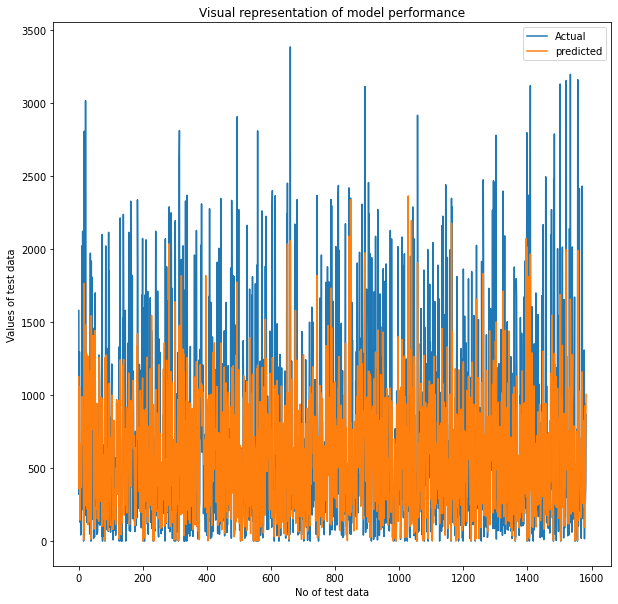

In [555]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(y_test_predict_lasso**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

### Ridge Implementation.

In [556]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)  # Fitting a ridge model.

Ridge(alpha=0.1)

In [557]:
independent_var

['Month__3',
 'Month__6',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Season__Winter',
 'Season__Autumn',
 'Month__4',
 'Month__9',
 'Season__Spring',
 'Month__1',
 'Holiday',
 'Is_Weekend',
 'Month__7',
 'Month__5',
 'Month__8',
 'Month__10',
 'year',
 'Is_snowing',
 'Visibility (10m)',
 'Season__Summer',
 'Month__12',
 'Solar Radiation (MJ/m2)',
 'Month__2',
 'Month__11',
 'Temperature(°C)',
 'Is_raning',
 'Functioning Day',
 'Hour']

In [558]:
# Ridge regression coef and intercept
print(ridge.coef_)
print(ridge.intercept_)

[[ -0.99197436   4.82054773 -12.61449655   4.79952527  -1.08116134
    2.31071741  -0.25482431  -2.07327327   0.44873781  -0.29220741
   -3.5635041   -1.89623705  -1.75844973   1.69553647  -4.74039187
    2.38215382  -0.82556703   0.88827069   1.87051783  -1.67829387
    0.82556703  -1.43214144  -1.61452097   2.00183687  40.8321849
  -12.29548375  29.24372421   9.16287258]]
[-20.0972566]


In [559]:
# Predicted the Y_train values from X_train.
y_train_predict_ridge = ridge.predict(X_train)

Text(0, 0.5, 'Residuals')

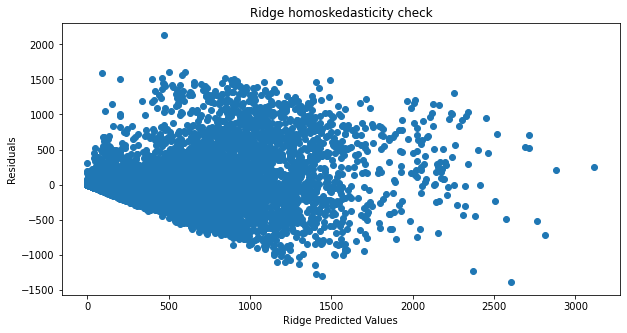

In [560]:
# Let us check if the assumptions of homoskedasticity and the residual mean ~= 0 are valid.
# homoskedasticity check.
residuals_ridge = ((y_train**2) - (y_train_predict_ridge)**2)
y_predicted_ridge = y_train_predict_ridge**2
plt.figure(figsize = (10,5))
plt.scatter(x = y_predicted_ridge, y = residuals_ridge)
plt.title('Ridge homoskedasticity check')
plt.xlabel('Ridge Predicted Values')
plt.ylabel('Residuals')

By looking at the scatter plot we can infer that the homoskedasticity assumption is true as there isn't they clear pattern that is being shown by the plot.

In [561]:
# Checking if the mean of the residuals is zero or close to zero.
np.mean(residuals_ridge)

52.23727001563523

The mean of the residual is close to zero.

In [562]:
# We will predict the test values.
y_test_predict_ridge = ridge.predict(X_test)

In [563]:
# Printing all the metrics of ridge training data.
r2_train_ridge = r2_score(y_train**2,y_train_predict_ridge**2)
print('R2 score:' ,r2_train_ridge)

adjusted_r2_train_ridge = (1-(1-r2_score(y_train**2, y_train_predict_ridge**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2 score: ', adjusted_r2_train_ridge)

mse_train_ridge = mean_squared_error(y_train**2,y_train_predict_ridge**2)
print('MSE: ',mse_train_ridge)

mae_train_ridge = mean_absolute_error(y_train**2,y_train_predict_ridge**2)
print('MAE: ',mae_train_ridge)

R2 score: 0.6131377057195688
Adjusted R2 score:  0.6061716965621078
MSE:  165577.9333732181
MAE:  279.5091638126391


In [564]:
# Printing all the metrics of lasso testing data.
r2_test_ridge = r2_score(y_test**2,y_test_predict_ridge**2)
print('R2 score: ',r2_test_ridge)

adjusted_r2_test_ridge = (1-(1-r2_score((y_test**2), (y_test_predict_ridge**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_ridge)

mse_test_ridge = mean_squared_error(y_test**2,y_test_predict_ridge**2)
print('MSE: ',mse_test_ridge)

mae_test_ridge = mean_absolute_error(y_test**2,y_test_predict_ridge**2)
print('MAE: ',mae_test_ridge)

R2 score:  0.6236986773233628
Adjusted R2 score:  0.6169228335709861
MSE:  170161.67656220088
MAE:  281.6689149717937


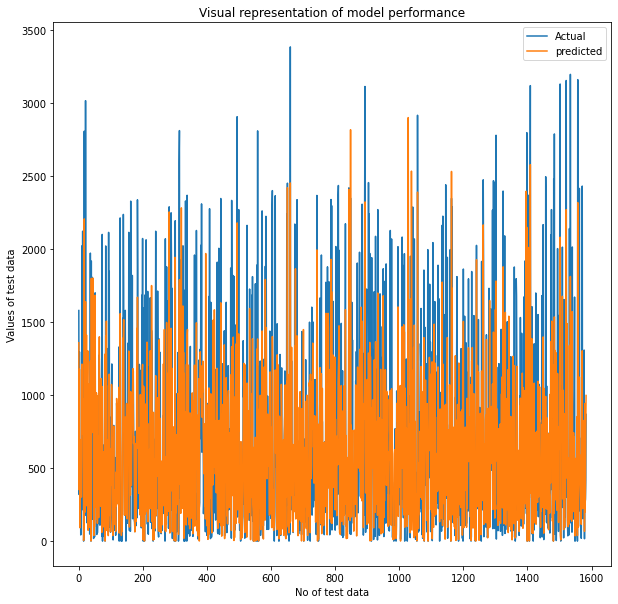

In [565]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(y_test_predict_ridge**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

ElasticNet Implementation.

In [566]:
# instantiating ElasticNet
elasticnet = ElasticNet(alpha = 0.5, l1_ratio = 0.3)

I have taken l1_ratio as 0.3 because I want to penalize my model more through ridge than lasso because a higher lasso penalty might make some features coef's to zero.

In [567]:
# Fitting a Elastic Net model to the model.
elasticnet.fit(X_train,y_train)
print(elasticnet.coef_)
print(elasticnet.intercept_)

[-0.15206631  0.96956811 -1.02514223  0.46300452 -3.0596947   0.41437512
 -0.          0.0055622   0.         -0.91265828 -0.05694525 -0.25211032
  0.3468441   0.32861324  0.          0.11374746  0.49076044 -0.45468696
  1.20506631  2.15483299 -0.49076007  1.34660508 -0.79911128 -0.
  2.02367632 -1.58030659  1.72677607  1.0505145 ]
[19.49190401]


In [568]:
# Predicted the Y_train values from X_train.
y_train_predict_elasticnet = elasticnet.predict(X_train)

Text(0, 0.5, 'Residuals')

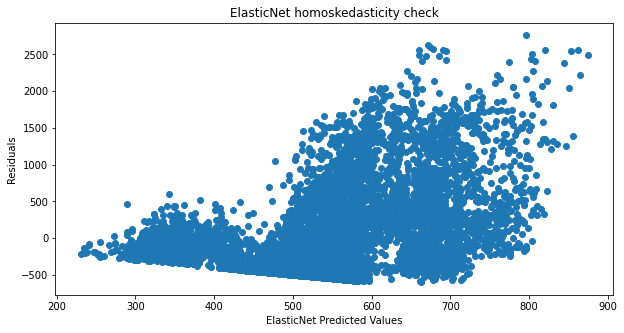

In [569]:
# Let us check if the assumptions of homoskedasticity and the residual mean ~= 0 are valid.
# homoskedasticity check.
residuals_elasticnet = ((y_train.flatten()**2) - (y_train_predict_elasticnet)**2)
y_predicted_elasticnet = y_train_predict_elasticnet**2
plt.figure(figsize = (10,5))
plt.scatter(x = y_predicted_elasticnet, y = residuals_elasticnet)
plt.title('ElasticNet homoskedasticity check')
plt.xlabel('ElasticNet Predicted Values')
plt.ylabel('Residuals')

By looking at the scatter plot we can infer that the homoskedasticity assumption is true as there isn't they clear pattern that is being shown by the plot.

In [570]:
# Checking if the mean of the residuals is zero or close to zero.
np.mean(residuals_elasticnet)

148.95890066890564

The mean of the residual is close to zero.

In [571]:
# We will predict the test values.
y_test_predict_elasticnet = elasticnet.predict(X_test)

In [572]:
# Printing all the metrics of elasticnet training data.
r2_train_elasticnet = r2_score(y_train**2,y_train_predict_elasticnet**2)
print('R2 score:' ,r2_train_elasticnet)

adjusted_r2_train_elasticnet = (1-(1-r2_score(y_train**2, y_train_predict_elasticnet**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2 score: ', adjusted_r2_train_elasticnet)

mse_train_elasticnet = mean_squared_error(y_train**2,y_train_predict_elasticnet**2)
print('MSE: ',mse_train_elasticnet)

mae_train_elasticnet = mean_absolute_error(y_train**2,y_train_predict_elasticnet**2)
print('MAE: ',mae_train_elasticnet)

R2 score: 0.1575805607713311
Adjusted R2 score:  0.14241159337685994
MSE:  360557.41756987246
MAE:  423.14127799319516


In [573]:
# Printing all the metrics of elasticnet testing data.
r2_test_elasticnet = r2_score(y_test**2,y_test_predict_elasticnet**2)
print('R2 score: ',r2_test_elasticnet)

adjusted_r2_test_elasticnet = (1-(1-r2_score((y_test**2), (y_test_predict_elasticnet**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_elasticnet)

mse_test_elasticnet = mean_squared_error(y_test**2,y_test_predict_elasticnet**2)
print('MSE: ',mse_test_elasticnet)

mae_test_elasticnet = mean_absolute_error(y_test**2,y_test_predict_elasticnet**2)
print('MAE: ',mae_test_elasticnet)

R2 score:  0.15616874749815735
Adjusted R2 score:  0.14097435838558403
MSE:  381576.49736640195
MAE:  437.69295105857776


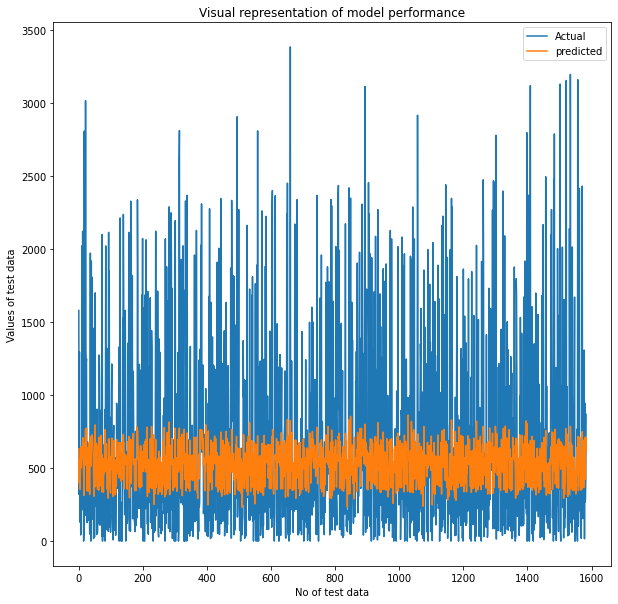

In [574]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(y_test_predict_elasticnet**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

### Comparing the performance of variables models 

In [575]:
# Creating a dataframe to compare the performance of the models.
arbitrary_models_performance = pd.DataFrame({'Model':['Linear Regression', 'Lasso Regression','Ridge Regression','ElasticNet Regression'],
              'R2 Scores':[r2_test,r2_test_lasso,r2_test_ridge,r2_test_elasticnet]})

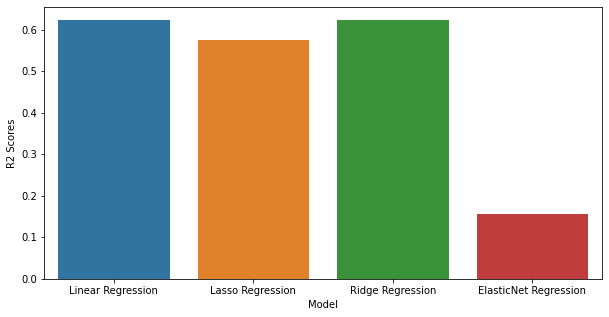

In [576]:
# Visualising the performance of the models.
plt.figure(figsize = (10,5))
sns.barplot(x = arbitrary_models_performance['Model'], y = arbitrary_models_performance['R2 Scores'], data = arbitrary_models_performance)

From the above bar chart, we can see that the Linear regression has a tiny edge over all the other regression models when the hyperparameters of lasso, ridge, elasticnet are set arbitrarily.

ElasticNet Regression is the worst performing regression model.

##Hyperparameter Tuning

Meaning of Hyperparameters:

Hyperparameters are those parameters that are used to control the performance of a model.

Hyperparameter tuning is the process of figuring out the best hyperparameters for the model. 

Hyperparameter tuning can be done in one of 3 following ways.

* Grid Search - It calculates the scoring for all the possible combinations of hyperparameters and returns that combination of hyperparameters that has the highest scoring.

* Random Search - It calculates the scoring for random combinations of hyperparameters and return that combination that has the highest scoring.

* Bayesian Optimization - Bayesian Optimization is an approach that uses Bayes Theorem to direct the search for hyperparameters in order to find the hyperparameters that return the maximum scoring.

I will be using Grid search to tune my hyperparameters because implementing regularised linear regression at all possible combinations of hyperparameters is not computational intensive becasue regularised linear regression is a simple model.

### Hyperparameter Tuning for Lasso Regression.

In [577]:
# Implementing Hyperparameter tuning for lasso regression.
grid_lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
gridsearch_lasso = GridSearchCV(grid_lasso,parameters,scoring = 'r2',cv = 10,verbose = 5) # instantiating gridsearch.
gridsearch_lasso.fit(X_train,y_train)   # Fitting the best parameters to the model.

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END ......................alpha=1e-15;, score=0.642 total time=   0.2s
[CV 2/10] END ......................alpha=1e-15;, score=0.660 total time=   0.2s
[CV 3/10] END ......................alpha=1e-15;, score=0.645 total time=   0.2s
[CV 4/10] END ......................alpha=1e-15;, score=0.657 total time=   0.3s
[CV 5/10] END ......................alpha=1e-15;, score=0.617 total time=   0.3s
[CV 6/10] END ......................alpha=1e-15;, score=0.680 total time=   0.5s
[CV 7/10] END ......................alpha=1e-15;, score=0.673 total time=   0.4s
[CV 8/10] END ......................alpha=1e-15;, score=0.689 total time=   0.5s
[CV 9/10] END ......................alpha=1e-15;, score=0.693 total time=   0.4s
[CV 10/10] END .....................alpha=1e-15;, score=0.695 total time=   0.5s
[CV 1/10] END ......................alpha=1e-10;, score=0.642 total time=   0.5s
[CV 2/10] END ......................alpha=1e-1

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='r2', verbose=5)

In [578]:
# The best parameters and the best score
print("The best fit alpha value is found out to be :" ,gridsearch_lasso.best_params_)
print("\nUsing ",gridsearch_lasso.best_params_, " the best r2 score is:", gridsearch_lasso.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the best r2 score is: 0.6652225920517744


In [579]:
# Making predictions test using the best found parameter.
gridsearch_lasso_y_test_predict = gridsearch_lasso.predict(X_test)

In [580]:
# Printing all the metrics at alpha = 0.0001
r2_test_gridsearch_lasso = r2_score(y_test**2,gridsearch_lasso_y_test_predict**2)
print('R2 score: ',r2_test_gridsearch_lasso)

adjusted_r2_test_gridsearch_lasso = (1-(1-r2_score((y_test**2), (gridsearch_lasso_y_test_predict**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_gridsearch_lasso)

mse_test_gridsearch_lasso = mean_squared_error(y_test**2,gridsearch_lasso_y_test_predict**2)
print('MSE: ',mse_test_gridsearch_lasso)

mae_test_gridsearch_lasso = mean_absolute_error(y_test**2,gridsearch_lasso_y_test_predict**2)
print('MAE: ',mae_test_gridsearch_lasso)

R2 score:  0.6237892677313439
Adjusted R2 score:  0.6170150551888858
MSE:  170120.71200860097
MAE:  281.62718693266424


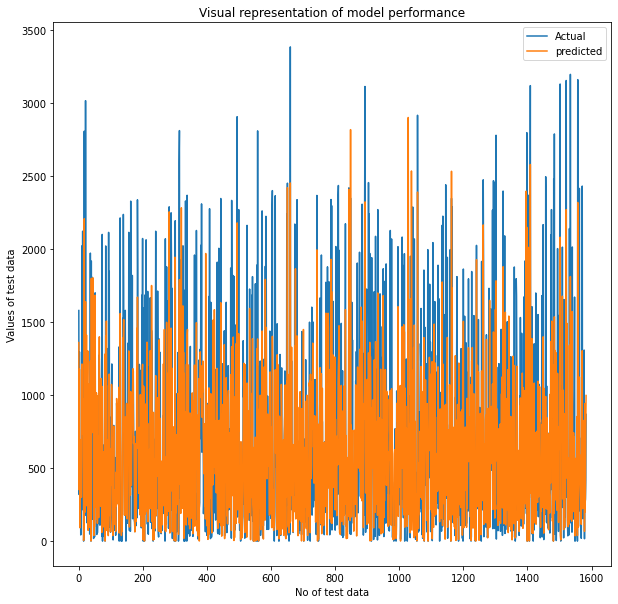

In [581]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(gridsearch_lasso_y_test_predict**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

### Hypertuning for Ridge Regression.

In [582]:
# Implementing Hypertuning for ridge regression.
grid_ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
gridsearch_ridge = GridSearchCV(grid_ridge, parameters, scoring = 'r2',cv = 10, verbose = 5) # instantiating gridsearch.
gridsearch_ridge.fit(X_train,y_train)   # Fitting the best parameters to the model.

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END ......................alpha=1e-15;, score=0.642 total time=   0.1s
[CV 2/10] END ......................alpha=1e-15;, score=0.660 total time=   0.0s
[CV 3/10] END ......................alpha=1e-15;, score=0.645 total time=   0.0s
[CV 4/10] END ......................alpha=1e-15;, score=0.657 total time=   0.0s
[CV 5/10] END ......................alpha=1e-15;, score=0.617 total time=   0.0s
[CV 6/10] END ......................alpha=1e-15;, score=0.680 total time=   0.0s
[CV 7/10] END ......................alpha=1e-15;, score=0.673 total time=   0.0s
[CV 8/10] END ......................alpha=1e-15;, score=0.689 total time=   0.0s
[CV 9/10] END ......................alpha=1e-15;, score=0.693 total time=   0.0s
[CV 10/10] END .....................alpha=1e-15;, score=0.695 total time=   0.0s
[CV 1/10] END ......................alpha=1e-10;, score=0.642 total time=   0.0s
[CV 2/10] END ......................alpha=1e-1

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='r2', verbose=5)

In [583]:
# The best parameters and the best score
print("The best fit alpha value is found out to be :" ,gridsearch_ridge.best_params_)
print("\nUsing ",gridsearch_ridge.best_params_, " the best r2 score is:", gridsearch_ridge.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the best r2 score is: 0.6652228357004216


In [584]:
# Making predictions test using the best found parameter.
gridsearch_ridge_y_test_predict = gridsearch_ridge.predict(X_test)

In [586]:
# Printing all the metrics at alpha = 0.01
r2_test_gridsearch_ridge = r2_score(y_test**2,gridsearch_ridge_y_test_predict**2)
print('R2 score: ',r2_test_gridsearch_ridge)

adjusted_r2_test_gridsearch_ridge = (1-(1-r2_score((y_test**2), (gridsearch_ridge_y_test_predict**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_gridsearch_ridge)

mse_test_gridsearch_ridge = mean_squared_error(y_test**2,gridsearch_ridge_y_test_predict**2)
print('MSE: ',mse_test_gridsearch_ridge)

mae_test_gridsearch_ridge = mean_absolute_error(y_test**2,gridsearch_ridge_y_test_predict**2)
print('MAE: ',mae_test_gridsearch_ridge)

R2 score:  0.6238163218075541
Adjusted R2 score:  0.617042596412449
MSE:  170108.4782834229
MAE:  281.6151401812196


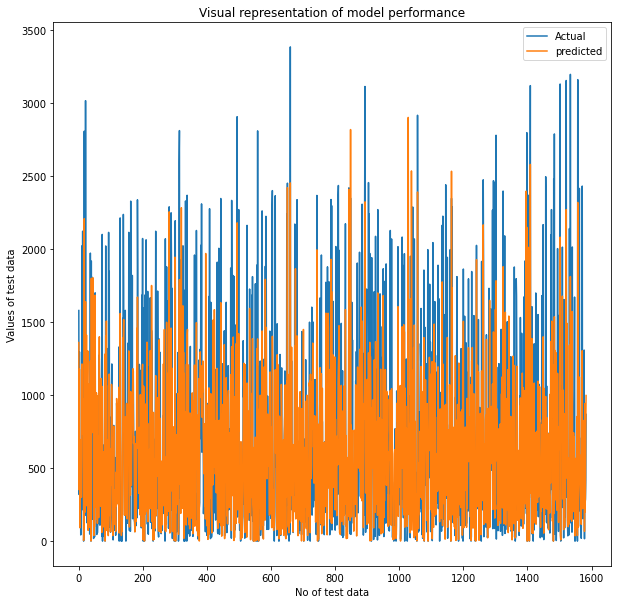

In [587]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(gridsearch_ridge_y_test_predict**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

###Hyper tuning for Elastic Net.

In [588]:
# Implementing Hypertuning for ridge regression.
grid_elasticnet = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
gridsearch_elasticnet = GridSearchCV(grid_elasticnet, parameters, scoring = 'r2',cv = 10, verbose = 5) # instantiating gridsearch.
gridsearch_elasticnet.fit(X_train,y_train)   # Fitting the best parameters to the model.

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.642 total time=   0.4s
[CV 2/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.660 total time=   0.6s
[CV 3/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.645 total time=   0.5s
[CV 4/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.657 total time=   0.4s
[CV 5/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.617 total time=   0.5s
[CV 6/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.680 total time=   0.5s
[CV 7/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.673 total time=   0.4s
[CV 8/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.689 total time=   0.5s
[CV 9/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.693 total time=   0.5s
[CV 10/10] END .......alpha=1e-15, l1_ratio=0.3;, score=0.695 total time=   0.3s
[CV 1/10] END ........alpha=1e-15, l1_ratio=0.4;, score=0.642 total time=   0.5s
[CV 2/10] END ........alpha=1e-15, l1_ratio=

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='r2', verbose=5)

In [589]:
# The best parameters and the best score
print("The best fit alpha value is found out to be :" ,gridsearch_elasticnet.best_params_)
print("\nUsing ",gridsearch_elasticnet.best_params_, " the best r2 score is:", gridsearch_elasticnet.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.6}

Using  {'alpha': 0.0001, 'l1_ratio': 0.6}  the best r2 score is: 0.6652250753874628


In [590]:
# Making predictions test using the best found parameter.
gridsearch_elasticnet_y_test_predict = gridsearch_elasticnet.predict(X_test)

In [592]:
# Printing all the metrics at alpha = 0.01
r2_test_gridsearch_elasticnet = r2_score(y_test**2,gridsearch_elasticnet_y_test_predict**2)
print('R2 score: ',r2_test_gridsearch_elasticnet)

adjusted_r2_test_gridsearch_elasticnet = (1-(1-r2_score((y_test**2), (gridsearch_elasticnet_y_test_predict**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_gridsearch_elasticnet)

mse_test_gridsearch_elasticnet = mean_squared_error(y_test**2,gridsearch_elasticnet_y_test_predict**2)
print('MSE: ',mse_test_gridsearch_elasticnet)

mae_test_gridsearch_elasticnet = mean_absolute_error(y_test**2,gridsearch_elasticnet_y_test_predict**2)
print('MAE: ',mae_test_gridsearch_elasticnet)

R2 score:  0.6234754376358077
Adjusted R2 score:  0.61669557413343
MSE:  170262.62449201258
MAE:  281.77003707468623


###Comparing the performance of CrossValidated Linear Regression, Hypertuned Lasso, Hypertuned Ridge, Hypertuned ElasticNet.

In [593]:
# Creating a dataframe to compare the models.
hypertuned_performance = pd.DataFrame({'Model':['Linear Regression', 'Lasso Regression','Ridge Regression','ElasticNet Regression'],
                                       'R2 Score':[avg_per,r2_test_gridsearch_lasso,r2_test_gridsearch_ridge,r2_test_gridsearch_elasticnet]})
hypertuned_performance

,Model,R2 Score
0,Linear Regression,0.665280
1,Lasso Regression,0.623789
2,Ridge Regression,0.623816
3,ElasticNet Regression,0.623475


As expected, the linear regression model only performed well when compared to other models because it wasn't not an overfitting model for regularised linear regression to penalize on.

###**Conclusion.**

* After implementing 4 different models on the dataset I came to the conclusion that the data is complex for the linear and regularised regression to understand the patterns. One must use more complex models like random forrest, XGBoost to get better results.

* I had a hunch from the begining that the linear regression and regularised regression might not relatively perform well. So I have engineered a lot of features like 'Is_raining','Is_raining' etc... to not loose on any data that has been provided in the dataset.

* The best performing model among the 4 models is Linear Regression. This makes sense because the model that we have built using Linear Regression by not overfitting for the regularised regression to penalise.

